# Statistical Analysis and Hypothesis Testing – A/B Testing of a Marketing Campaign

## Objective
Conduct an A/B test to evaluate the effectiveness of two marketing campaigns using statistical analysis.

## Dataset
Use a dataset for A/B testing from platforms such as Kaggle or the UCI Machine Learning Repository.

---

## Part 1: Data Loading and Preprocessing

### Tasks:
1. Load a dataset containing user interaction data for two marketing campaigns (A and B).
2. Clean the data by handling missing or incorrect values to ensure the dataset is ready for analysis.

### Output:
- A cleaned and structured dataset for further analysis.

---

# Data Loading and Preprocessing

This section focuses on preparing the dataset for analysis by following these steps:

## Objective
- Load a dataset containing user interaction data from two marketing campaigns (A and B).
- Clean the data by handling missing or incorrect values to ensure its quality for further analysis.

The goal is to create a clean and structured dataset that can be used for reliable and accurate analysis in subsequent sections.


### Import + config

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from functions import *

## Steps
1. **Data Loading**: Import the dataset into the notebook for analysis. Ensure the data contains information about user interactions with campaigns A and B.

In [3]:
control_df = pd.read_csv('datasets/control_group.csv', delimiter=',')
test_df = pd.read_csv('datasets/test_group.csv', delimiter=',')


2. **Data Cleaning**: 
   - Identify and handle any missing values (e.g., using imputation or removal).
   - Correct or remove invalid data entries.
   - Ensure consistency in data formats (e.g., dates, numerical values, categorical labels).

In [4]:
control_df.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [5]:
# Apply the function to both DataFrames
control_df = clean_column_names(control_df)
test_df = clean_column_names(test_df)

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')
Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')


In [6]:
control_df.columns

Index(['campaign_name', 'date', 'spend', 'impressions', 'reach',
       'website_clicks', 'searches', 'view_content', 'add_to_cart',
       'purchase'],
      dtype='object')

In [7]:
# Apply the function to both datasets
columns = control_df.select_dtypes(include=['number']).columns.tolist()
control_df_i = correct_using_interpolation(control_df, columns)
test_df_i = correct_using_interpolation(test_df, columns)


In [8]:
control_df.columns

Index(['campaign_name', 'date', 'spend', 'impressions', 'reach',
       'website_clicks', 'searches', 'view_content', 'add_to_cart',
       'purchase'],
      dtype='object')

In [9]:
# Check logical consistency after cleaning column names
control_details = check_logical_consistency(control_df)
test_details = check_logical_consistency(test_df)

In [10]:
log_anomalies(control_details, 'control', 'before')
log_anomalies(test_details, 'test', 'before')

Anomalies in control dataset before correction:
Sum of anomalies: 8
Anomalies in rows:
Row 3
Row 6
Row 9
Row 11
Row 13
Row 14
Row 19
Row 27
Anomalies in test dataset before correction:
Sum of anomalies: 1
Anomalies in rows:
Row 4


In [11]:
# Use the method to check data in both groups
inconsistent_control_details = check_logical_consistency(control_df_i)
inconsistent_test_details = check_logical_consistency(test_df_i)

In [12]:
# Log the results of the check
log_anomalies(inconsistent_control_details, 'control', 'after')
log_anomalies(inconsistent_test_details, 'test', 'after')

Anomalies in control dataset after correction:
Sum of anomalies: 0
Anomalies in test dataset after correction:
Sum of anomalies: 0


In [13]:
# Fill missing values with the mean for numeric columns
control_df_i = fill_missing_with_rounded_mean(control_df_i)
test_df_i = fill_missing_with_rounded_mean(test_df_i)

# Convert only numeric columns to numeric types
numeric_columns = control_df_i.select_dtypes(include=['number']).columns
control_df_i[numeric_columns] = control_df_i[numeric_columns].apply(pd.to_numeric)
test_df_i[numeric_columns] = test_df_i[numeric_columns].apply(pd.to_numeric)

control_df_i['spend'] = control_df_i['spend'].astype('float')
test_df_i['spend'] = test_df_i['spend'].astype('float')

In [14]:
# Save the processed DataFrames to CSV files
control_df_i.to_csv("datasets/control_i.csv", index=False)
test_df_i.to_csv("datasets/test_i.csv", index=False)

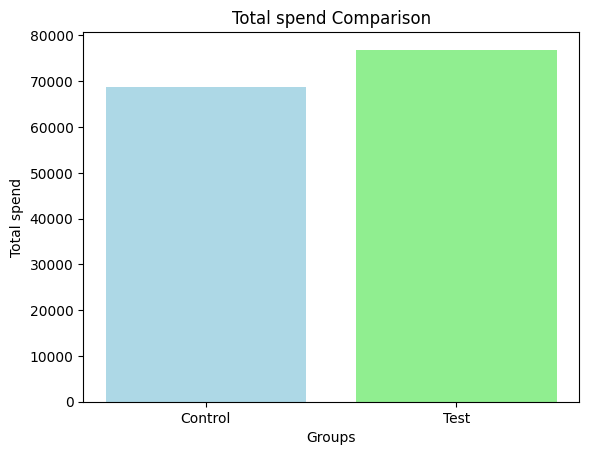

In [15]:
plot_comparison_column(control_df_i, test_df_i, 'spend')